## Proyecto: Emisiones de CO₂


---
# Objetivo
El objetivo de este proyecto es realizar un análisis de datos del conjunto "Emissions by Country" extraído de Kaggle. En él se explorará el conjunto de datos para analizar el comportamiento de las emisiones de CO₂ de fuente fosil a lo largo del tiempo, cuáles son las fuentes más significativas, entre otras incógnitas desarrolladas en la siguiente investigación.

---
# Contexto y problema comercial

Las problemáticas ambientales nos preocupan cada vez más y uno de los factores que mayor incidencia tienen sobre estas son las emisiones de CO₂. Este proyecto está dirigido a quienes estén interesados en el seguimiento y evolución de las emisiones de CO₂, a los organismos gubernamentales o privados, universidades y agencias de investigación, con el fin de facilitar mediante técnicas analíticas el proceso de control, la provisión de recursos y la gestión de forma eficiente de las estrategias adecuadas con el fin de reducir la contaminación y combatir el cambio climático, etc.

---

# Contexto analítico
El conjunto de datos utilizado proporciona información valiosa para lograr comprender el comportamiento de las emisiones de CO₂ (Dióxido de Carbono) a nivel global. Así también, las principales fuentes emisoras de CO₂ por cada país del mundo a lo largo de los años (1750 - 2021).

Los datos están organizados en las siguientes columnas:

* Country: El nombre del país. (String)
* ISO 3166-1 alfa-3: El código de tres letras del país. (String)
* Year: El año de los datos. (Integer)
* Total: La cantidad total de emisiones de CO₂ del país en el año dado. (Float)
* Carbon: La cantidad de emisiones de CO₂ del carbón para el país en el año dado. (Float)
* Oil: La cantidad de emisiones de CO₂ del petróleo para el país en el año dado. (Float)
* Gas: La cantidad de emisiones de CO₂ del gas para el país en el año dado. (Float)
* Cement: La cantidad de emisiones de CO₂ de la producción de cemento para el país en el año dado. (Float)
* Flaring: La cantidad de emisiones de CO₂ de las operaciones de quema para el país en el año dado. (Float)
* Others: La cantidad de emisiones de CO₂ de otras fuentes para el país en el año dado. (Float)
* Per Capita: La cantidad de emisiones de CO₂ per cápita del país en el año dado. (Float)

A partir del análisis exploratorio de datos (EDA), intentaremos responder las siguientes preguntas:
* ¿Cómo han cambiado las emisiones de CO₂ a lo largo del tiempo?
* ¿Cómo han cambiado las emisiones de CO₂ por fuente de emisión?
* ¿Cómo han cambiado las emsiones de CO₂ por región a lo largo del tiempo?
* ¿Cuáles son los países que emiten la mayor cantidad de CO₂ en el mundo?
* ¿Cómo se comportan las fuentes de emisiones de CO₂ en los países que emiten  la mayor cantidad de CO₂ en el mundo?
* ¿Cuáles son los países que emiten más CO₂ per cápita?
* ¿Hay alguna relación entre las fuentes de emisiones?
* ¿Cómo se comportan las emsiones de CO₂ por region?

Según las respuestas y conclusiones obtenidas a partir del análisis anterior, y la aplicación de modelos predictivos, se busca responder alguna de las siguientes incógnitas:

* ¿Cómo se espera que cambien las emisiones de CO₂ en el futuro, según las 
tendencias actuales?
* ¿Cuáles serán las emisiones de CO₂ de un determinado país o región en un futuro próximo o lejano?






## 1 Importación de datos y librerias



In [ ]:
# Importar bibliotecas utilizadas para manipular datos y crear visualizaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Estilos utilizados
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')

In [ ]:
# Importar conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/briancabral95/proyeto-emisiones-data-science/main/Emissions%20by%20Country.csv')
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2 Análisis Exploratorio de Datos (EDA)

---



### 2.1 Información general

In [ ]:
# Tamaño del conjunto de datos
print("\nFilas, columnas: \n", df.shape)

# Nombre de las columnas
print("\nColumnas: \n", df.columns)

# Identificar los tipos de datos
print("\nTipos de datos: \n", df.dtypes)

# Identificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Busqueda de duplicados
print("\nDuplicados: \n", df.duplicated().sum())

# Valores unicos en columna "Country"
print("\nPaíses: \n",df['Country'].unique())


Filas, columnas: 
 (63104, 11)

Columnas: 
 Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

Tipos de datos: 
 Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

Valores faltantes: 
 Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

Duplicados: 
 0

Países: 
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'A

In [ ]:
# Informacíon sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


### 2.2 Manipulación de datos

In [ ]:
# Lista de codigos ISO de 3 letras de todos los países, extraída de Wikipedia
wiki_codes = ['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'MKD', 'MNP', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SGS', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SJM', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'UMI', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'VGB', 'VIR', 'WLF', 'ESH', 'YEM', 'ZMB', 'ZWE']

# Qué valores de la columna "Country" no son paises según la lista wiki_codes?
no_countries = df[~df['ISO 3166-1 alpha-3'].isin(wiki_codes)]
no_countries['Country'].unique()

array(['Panama Canal Zone', 'French Equatorial Africa',
       'French West Africa', 'Kosovo', 'Kuwaiti Oil Fires',
       'Leeward Islands', 'Pacific Islands (Palau)', 'Ryukyu Islands',
       'Swaziland', 'International Transport', 'Global'], dtype=object)

In [ ]:
# Separar los códigos ISO por regiones 
africa_codes = ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CPV', 'CAF', 'TCD', 'COM', 'COG', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MYT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'COD', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ESH', 'ZMB', 'ZWE']
asia_codes = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'CXR', 'CCK', 'IOT', 'GEO', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MAC', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'KOR', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']
europe_codes = ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'KAZ', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT', 'KOS', 'ALA', 'FRO', 'GRL', 'GGY', 'JEY', 'IMN', 'MNE', 'SRB']
latin_america_codes = ['ARG', 'BHS', 'BLZ', 'BOL', 'BRA', 'CHL', 'COL', 'CRI', 'CUB', 'DMA', 'DOM', 'ECU', 'SLV', 'FLK', 'GUF', 'GRD', 'GTM', 'GUY', 'HTI', 'HND', 'JAM', 'MEX', 'MSR', 'NIC', 'PAN', 'PRY', 'PER', 'PRI', 'KNA', 'LCA', 'VCT', 'SUR', 'TTO', 'URY', 'VEN']
north_america_codes = ['ATG', 'BHS', 'BRB', 'BLZ', 'CAN', 'CYM', 'CRI', 'CUB', 'DMA', 'DOM', 'SLV', 'GRL', 'GRD', 'GLP', 'GTM', 'HTI', 'HND', 'JAM', 'MTQ', 'MEX', 'SPM', 'MSR', 'ANT', 'KNA', 'NIC', 'PAN', 'PRI', 'KNA', 'LCA', 'SPM', 'VCT', 'TTO', 'TCA', 'USA', 'VGB']


In [ ]:
# Extraer los datos de emisiones globales
Global = df[df['Country']=='Global']

# Extraer los datos de emisiones causadas por transporte internacional
International_transport = df[df['Country']=='International Transport']

# Quitar del dataframe aquellos valores de la columna 'Country' que no son identificados como países
Emissions = df[~df['Country'].isin(no_countries['Country'].unique())]

# Reemplazar valores NaN por 0
Emissions.fillna(0, inplace = True)
Emissions.head()

# Dividir los datos por region:

# Africa
africa = Emissions[Emissions['ISO 3166-1 alpha-3'].isin(africa_codes)]
# Asia
asia = Emissions[Emissions['ISO 3166-1 alpha-3'].isin(asia_codes)]
# Europe
europe = Emissions[Emissions['ISO 3166-1 alpha-3'].isin(europe_codes)]
# América latina
latin_america = Emissions[Emissions['ISO 3166-1 alpha-3'].isin(latin_america_codes)]
# América del norte
north_america = Emissions[Emissions['ISO 3166-1 alpha-3'].isin(north_america_codes)]

<ipython-input-9-7d463af39ca3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emissions.fillna(0, inplace = True)


### 2.3 Visualizaciones

#### 2.3.1 ¿Cómo han cambiado las emisiones de CO₂ a lo largo del tiempo?

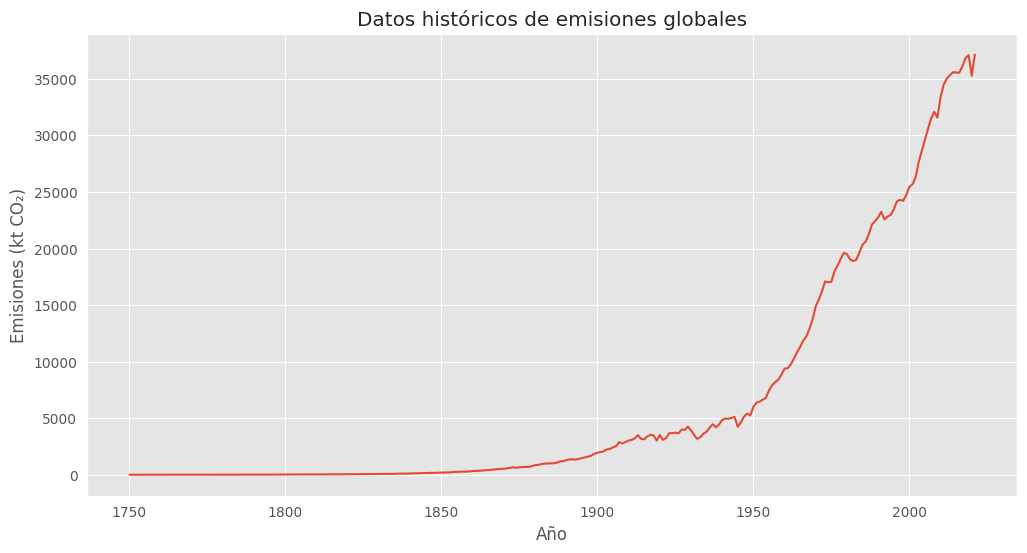

In [ ]:
# Crear gráfico de linea
plt.figure(figsize = (12,6))
plt.plot(Global['Year'], Global['Total'])

plt.title('Datos históricos de emisiones globales')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')
plt.show()

#### 2.3.2 ¿Cómo han cambiado las emisiones de CO₂ por fuente de emisión?

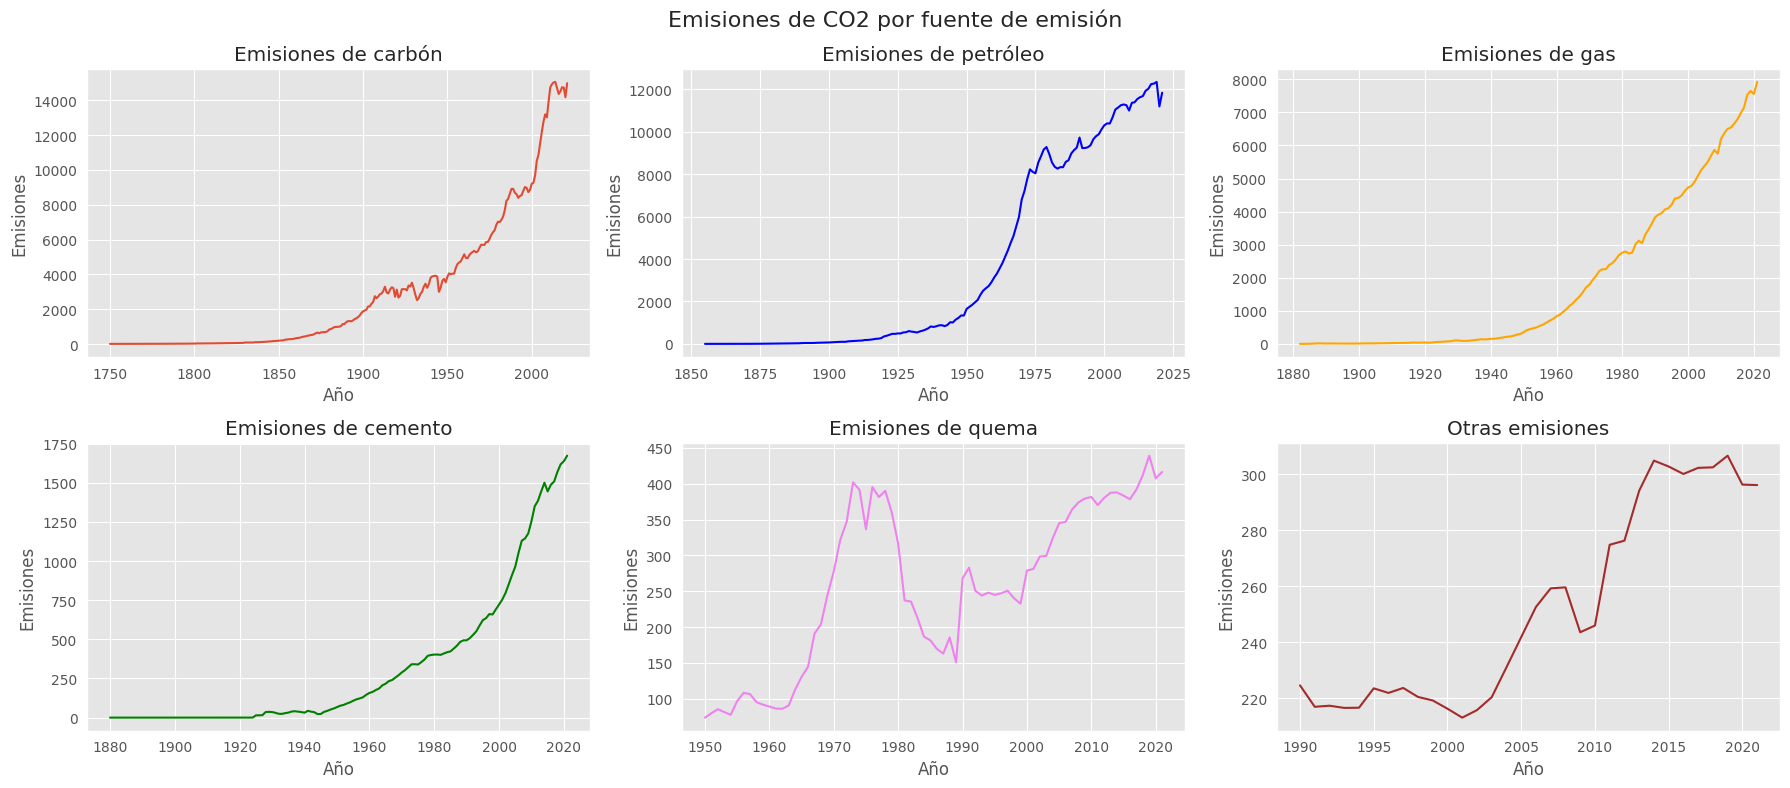

In [ ]:
# Crear gráficos de lineas para cada fuente de emisión
plt.figure(figsize=(18, 8))
# Carbón
plt.subplot(2, 3, 1)
plt.plot(Global['Year'], Global['Coal'])
plt.title('Emisiones de carbón')
plt.xlabel('Año')
plt.ylabel('Emisiones')

# Petróleo
plt.subplot(2, 3, 2)
plt.plot(Global['Year'], Global['Oil'], color='blue')
plt.title('Emisiones de petróleo')
plt.xlabel('Año')
plt.ylabel('Emisiones')

# Gas
plt.subplot(2, 3, 3)
plt.plot(Global['Year'], Global['Gas'], color='orange')
plt.title('Emisiones de gas')
plt.xlabel('Año')
plt.ylabel('Emisiones')

# Cemento
plt.subplot(2, 3, 4)
plt.plot(Global['Year'], Global['Cement'], color='green')
plt.title('Emisiones de cemento')
plt.xlabel('Año')
plt.ylabel('Emisiones')

# Quema
plt.subplot(2, 3, 5)
plt.plot(Global['Year'], Global['Flaring'], color='violet')
plt.title('Emisiones de quema')
plt.xlabel('Año')
plt.ylabel('Emisiones')

# Otras emisiones
plt.subplot(2, 3, 6)
plt.plot(Global['Year'], Global['Other'], color='brown')
plt.title('Otras emisiones')
plt.xlabel('Año')
plt.ylabel('Emisiones')

plt.suptitle('Emisiones de CO2 por fuente de emisión', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# Separar los datos de las fuentes de emisión
sources = Global.iloc[:, 4:10].sum().reset_index()

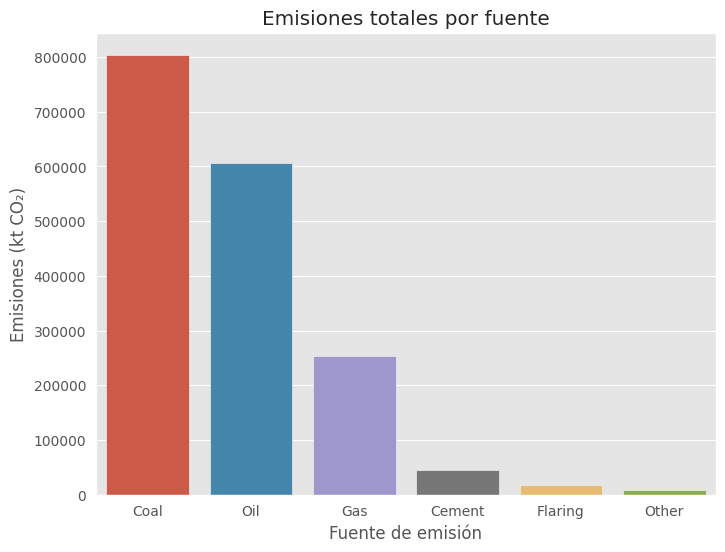

In [ ]:
# Crear grafico de barras con las emisiones totales por fuente
plt.figure(figsize = (8,6))
sns.barplot(x = sources.iloc[:, 0], y = sources.iloc[:, 1])

plt.title('Emisiones totales por fuente')
plt.xlabel('Fuente de emisión')
plt.ylabel('Emisiones (kt CO₂)')
plt.show()

#### 2.3.3 ¿Cómo han cambiado las emisiones de CO₂ por región a lo largo del tiempo?

In [ ]:
# Promedio de emisiones por año en cada región
africa_total = africa.groupby('Year').sum(numeric_only=True).reset_index()

asia_total = asia.groupby('Year').sum(numeric_only=True).reset_index()

europe_total = europe.groupby('Year').sum(numeric_only=True).reset_index()

latin_america_total = latin_america.groupby('Year').sum(numeric_only=True).reset_index()

north_america_total = north_america.groupby('Year').sum(numeric_only=True).reset_index()

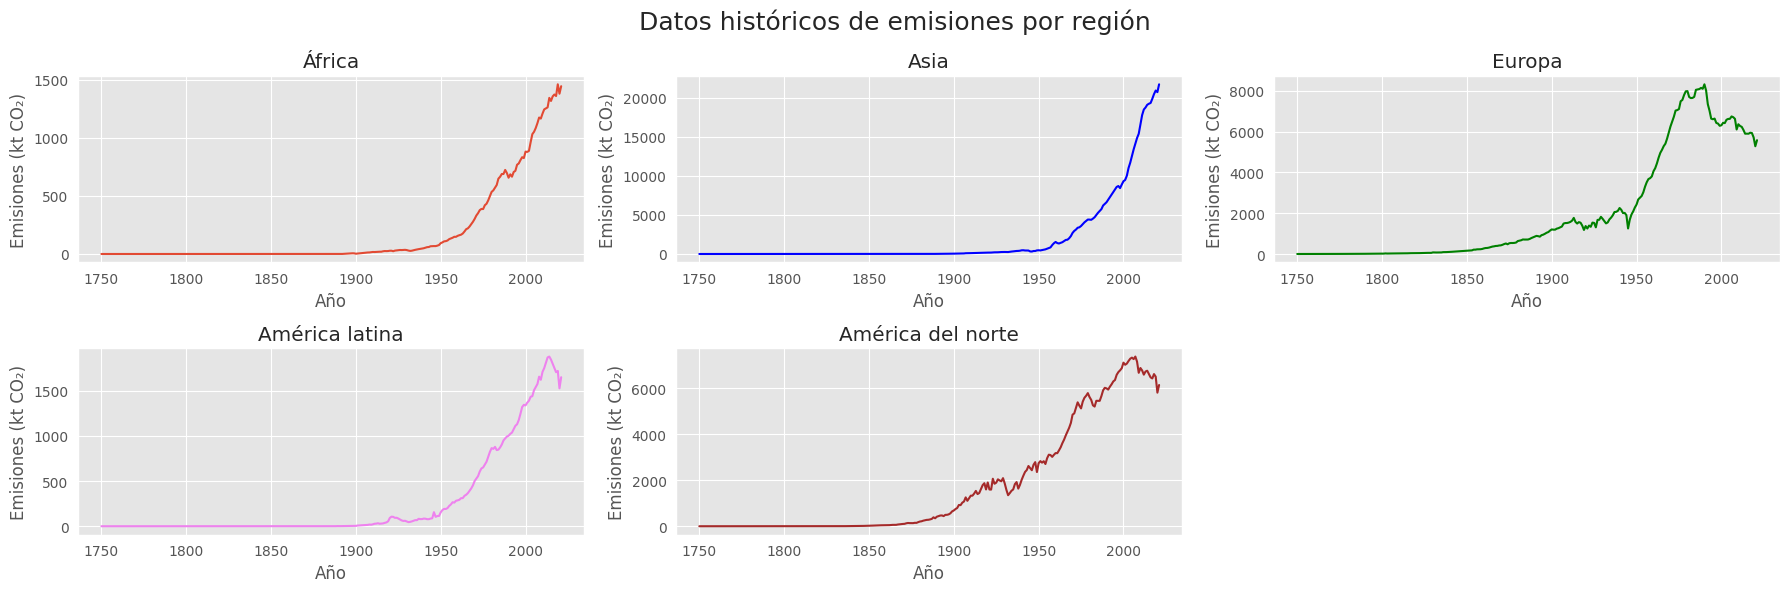

In [ ]:
# Crear gráfico de linea
plt.figure(figsize = (18,6))

# África
plt.subplot(2, 3, 1)
plt.plot(africa_total['Year'], africa_total['Total'])
plt.title('África')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# Asia
plt.subplot(2, 3, 2)
plt.plot(asia_total['Year'], asia_total['Total'], color=('blue'))
plt.title('Asia')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# Europa
plt.subplot(2, 3, 3)
plt.plot(europe_total['Year'], europe_total['Total'], color=('green'))
plt.title('Europa')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# América del sur
plt.subplot(2, 3, 4)
plt.plot(latin_america_total['Year'], latin_america_total['Total'], color=('violet'))
plt.title('América latina')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# América del norte
plt.subplot(2, 3, 5)
plt.plot(north_america_total['Year'], north_america_total['Total'], color=('brown'))
plt.title('América del norte')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

plt.suptitle('Datos históricos de emisiones por región', fontsize=18)
plt.tight_layout()
plt.show()

#### 2.3.4 ¿Cuáles son los países que emiten la mayor cantidad de CO₂ en el mundo?

In [ ]:
# Extraer el top 10 de países con más emisiones
top_ten_countries = Emissions.groupby('Country').sum(numeric_only=True).sort_values(by='Total', ascending=False).reset_index()

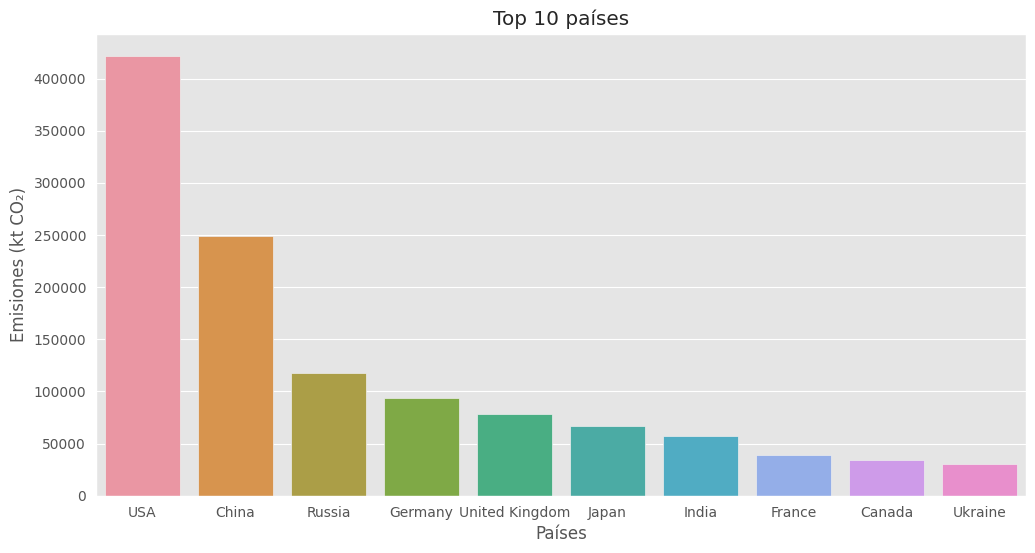

In [ ]:
# Crear grafico de barras "Top 10 países"
plt.figure(figsize = (12,6))
sns.barplot(x = top_ten_countries['Country'][:10], y = top_ten_countries['Total'][:10])

plt.title('Top 10 países')
plt.xlabel('Países')
plt.ylabel('Emisiones (kt CO₂)')
plt.show()

#### 2.3.5 ¿Cómo se comportan las emisiones en los países que emiten mayor cantidad de CO₂?

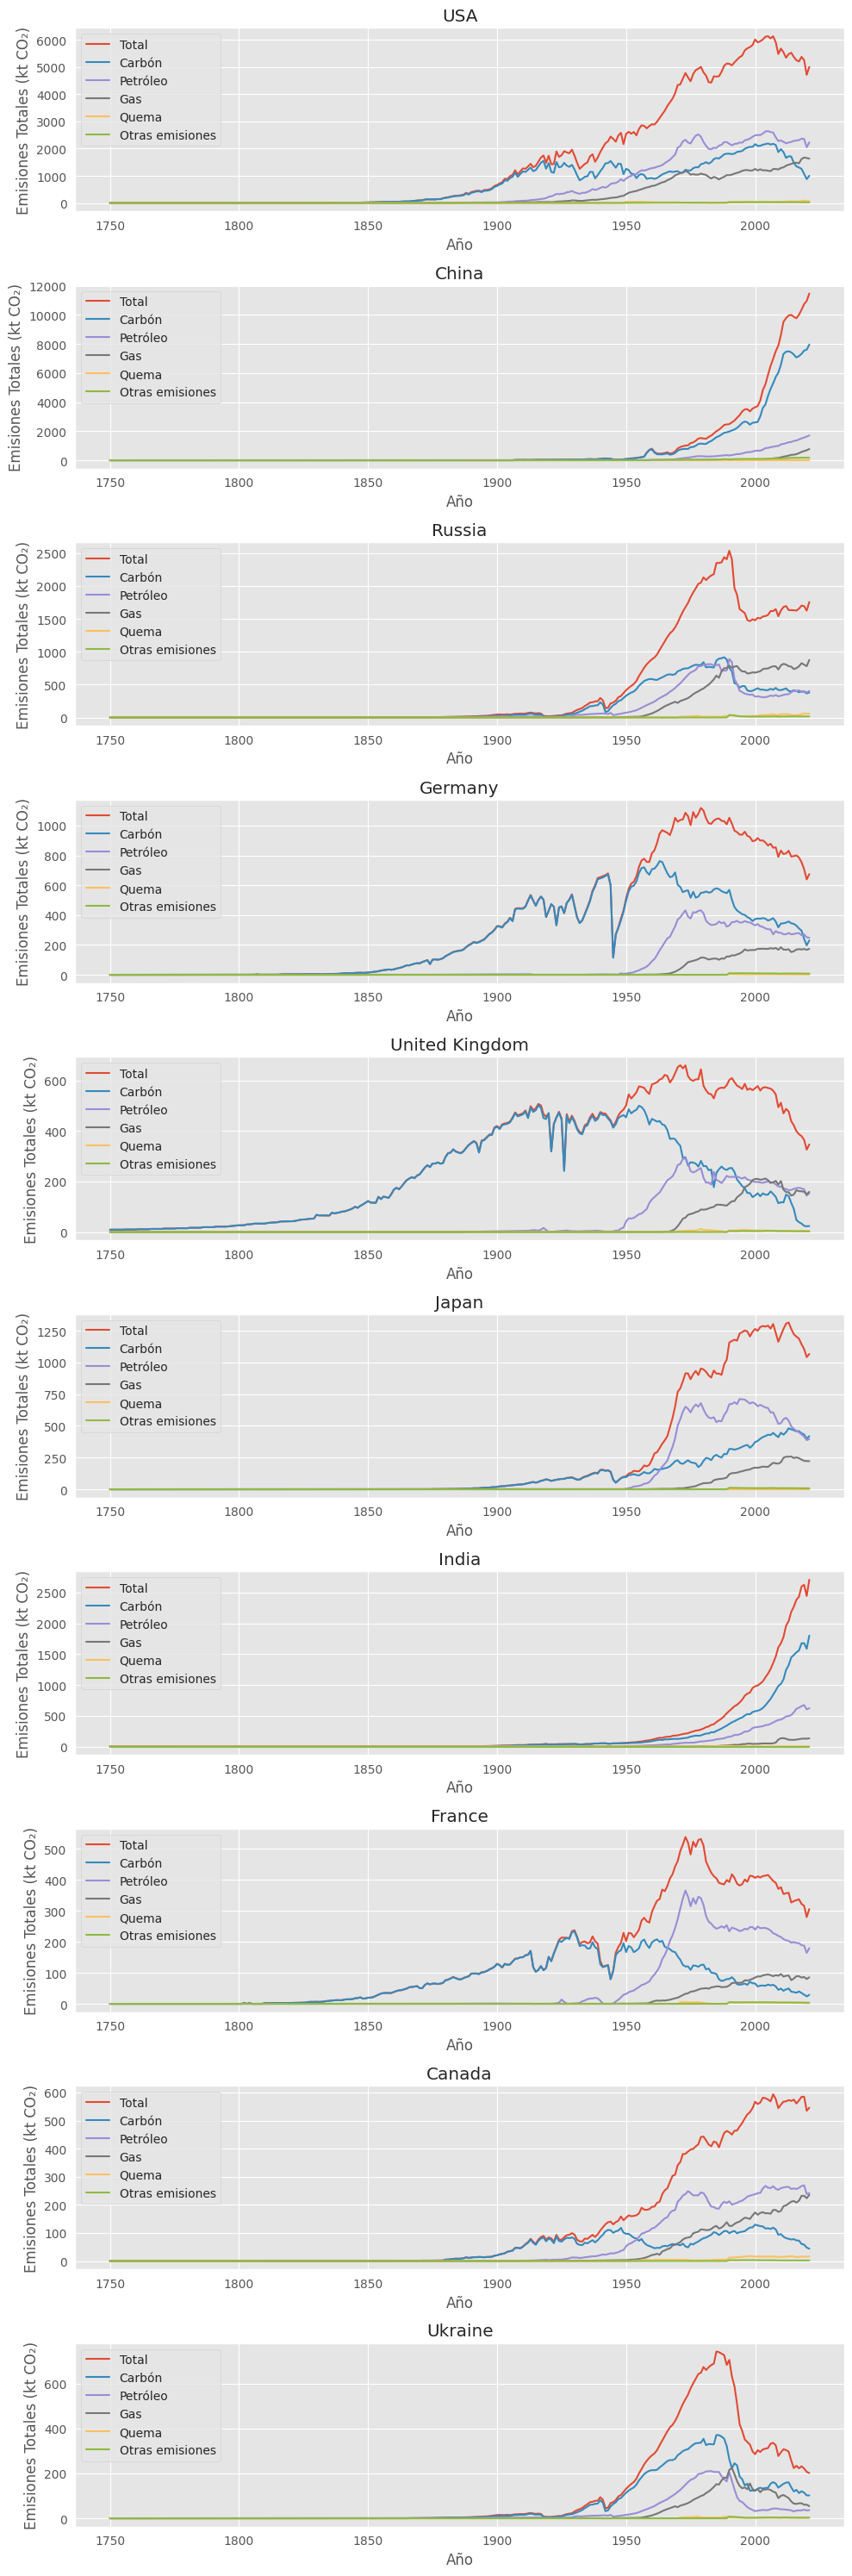

In [ ]:
# Crear lista con los paises del top 10
countries = top_ten_countries['Country'][:10].tolist()

# Crear lista con el numero de paises del top 10
num_plots = len(countries)

# Crear un gráfico de lineas para cada fuente de emisión, utilizando un bucle "for"
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 30))


for i, country in enumerate(countries):
  country_data = Emissions[Emissions['Country'] == country]
  axs[i].plot(country_data['Year'], country_data['Total'], label='Total')
  axs[i].plot(country_data['Year'], country_data['Coal'], label='Carbón')
  axs[i].plot(country_data['Year'], country_data['Oil'], label='Petróleo')
  axs[i].plot(country_data['Year'], country_data['Gas'], label='Gas')
  axs[i].plot(country_data['Year'], country_data['Flaring'], label='Quema')
  axs[i].plot(country_data['Year'], country_data['Other'], label='Otras emisiones')
  axs[i].set_ylabel('Emisiones Totales (kt CO₂)')
  axs[i].set_xlabel('Año')
  axs[i].set_title(country)
  axs[i].legend()

fig.tight_layout()
plt.legend()
plt.show()

#### 2.3.6 ¿Cuáles son las principales fuentes de emisiones de CO₂ en cada país?

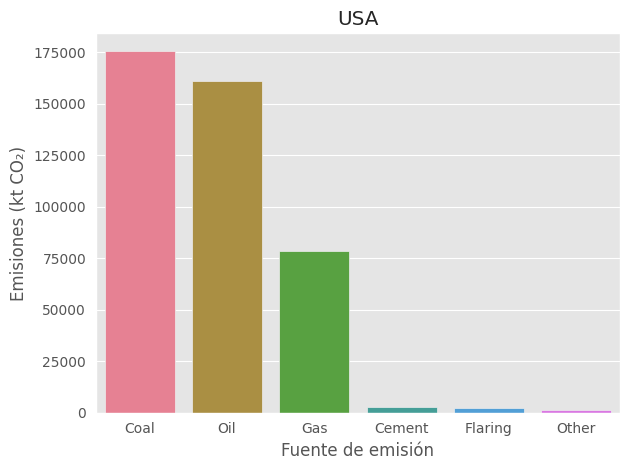

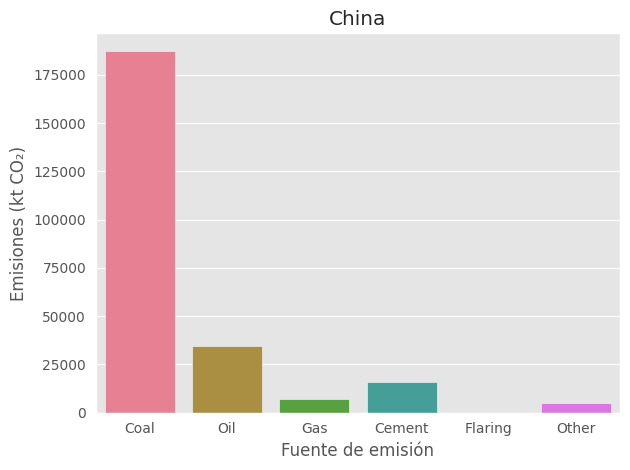

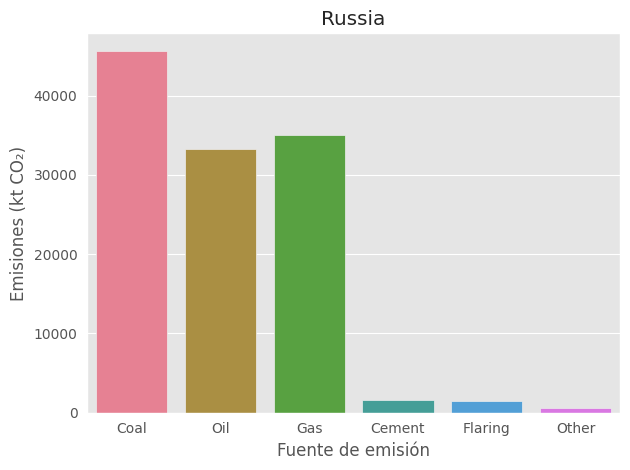

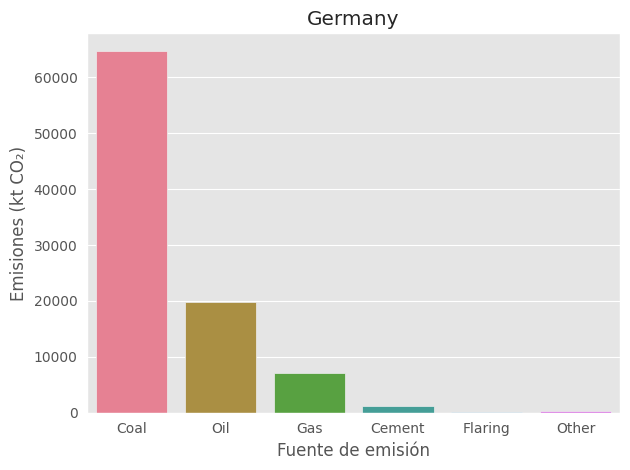

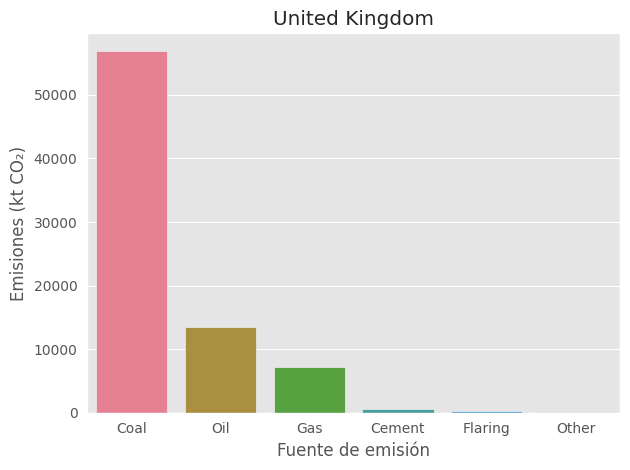

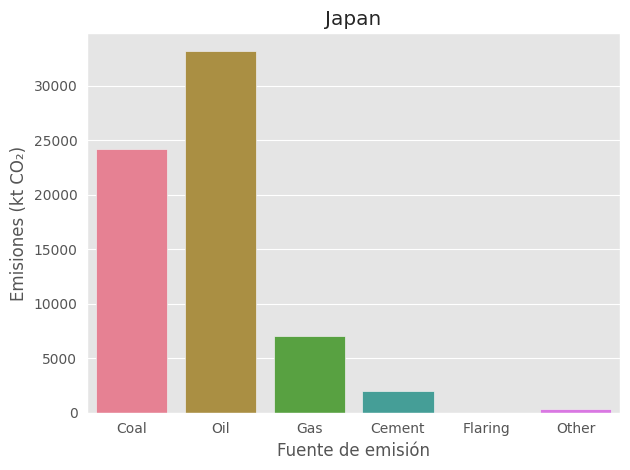

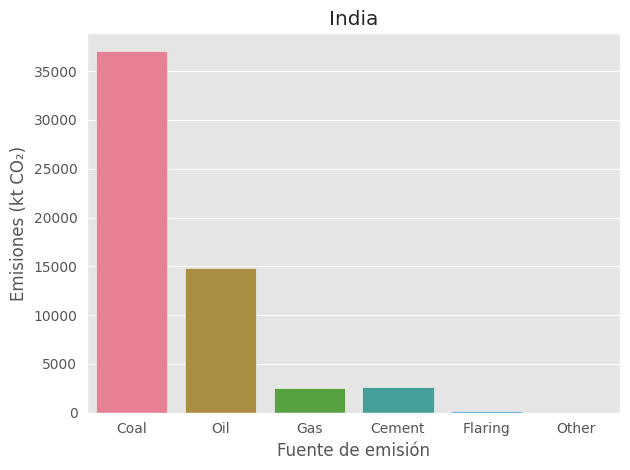

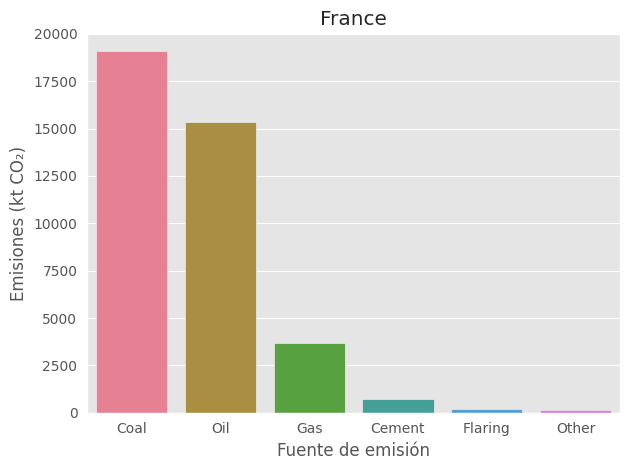

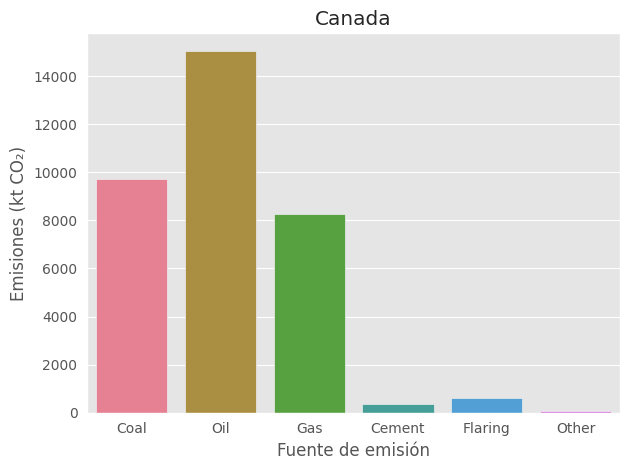

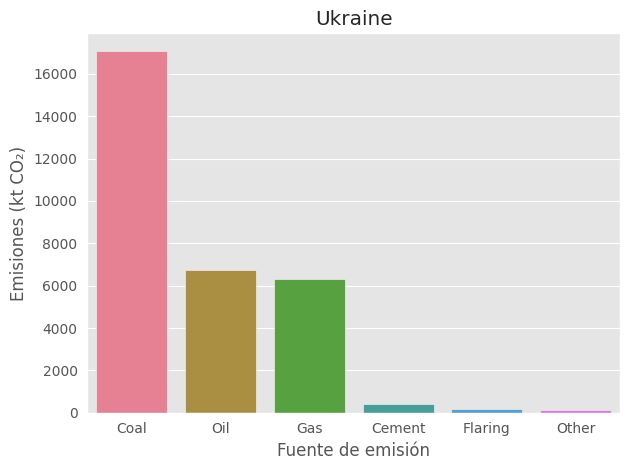

In [ ]:
# Crear un gráfico de barras para cada país, con las emisiones que genera cada fuente
for country in countries:
    
  country_data = Emissions[Emissions['Country'] == country]
    
  source_totals = country_data[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].sum()
    
  ax = sns.barplot(x = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other'], y = source_totals, palette='husl')
    
  ax.set_title(f'{country}')
  ax.set_xlabel('Fuente de emisión')
  ax.set_ylabel('Emisiones (kt CO₂)')

  plt.tight_layout()  
  plt.show()

#### 2.3.7 ¿Cuáles son los países que emiten más CO₂ per cápita en los últimos años?

In [ ]:
# Extraer el top 10 de países con más emisiones per cápita
top_ten_countries_percapita = Emissions[Emissions['Year']>=2011]
top_ten_countries_percapita = top_ten_countries_percapita.groupby('Country').mean(numeric_only=True).sort_values(by='Per Capita', ascending=False).reset_index()

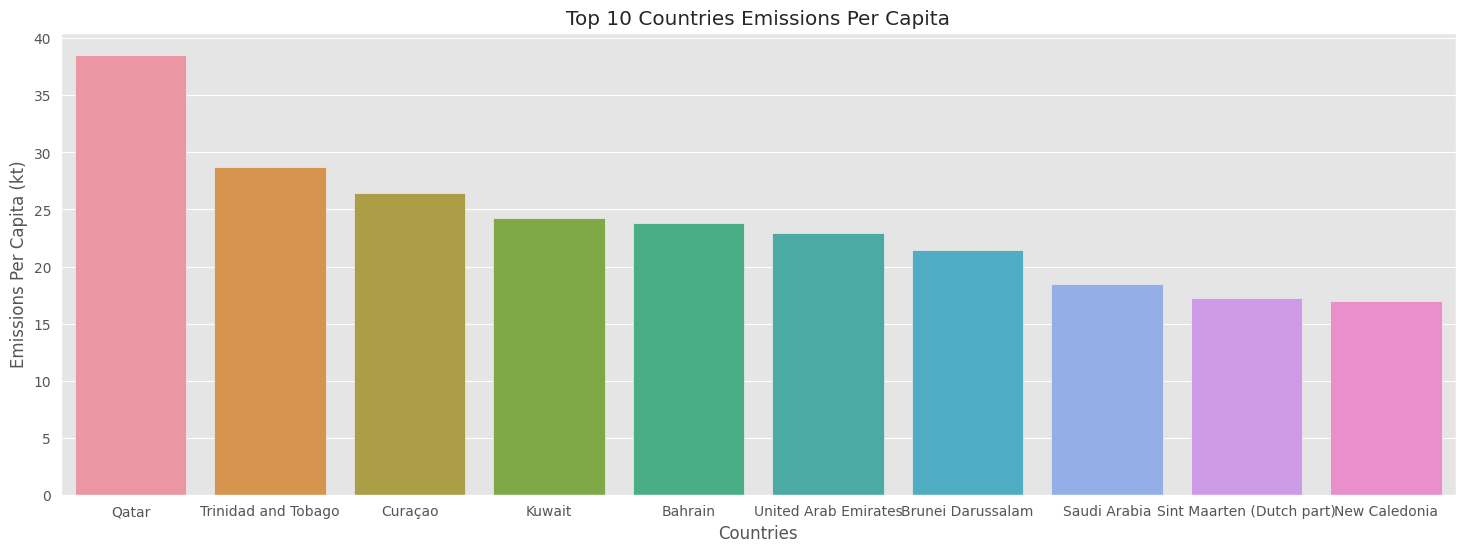

In [ ]:
# Crear un grafico de barras con el top 10 países con más emisiones per cápita
plt.figure(figsize = (18,6))
sns.barplot(x = top_ten_countries_percapita['Country'][:10], y = top_ten_countries_percapita['Per Capita'][:10])

plt.title('Top 10 Countries Emissions Per Capita')
plt.xlabel('Countries')
plt.ylabel('Emissions Per Capita (kt)')
plt.show()

#### 2.3.8 ¿Hay alguna relación entre las fuentes de emisiones?

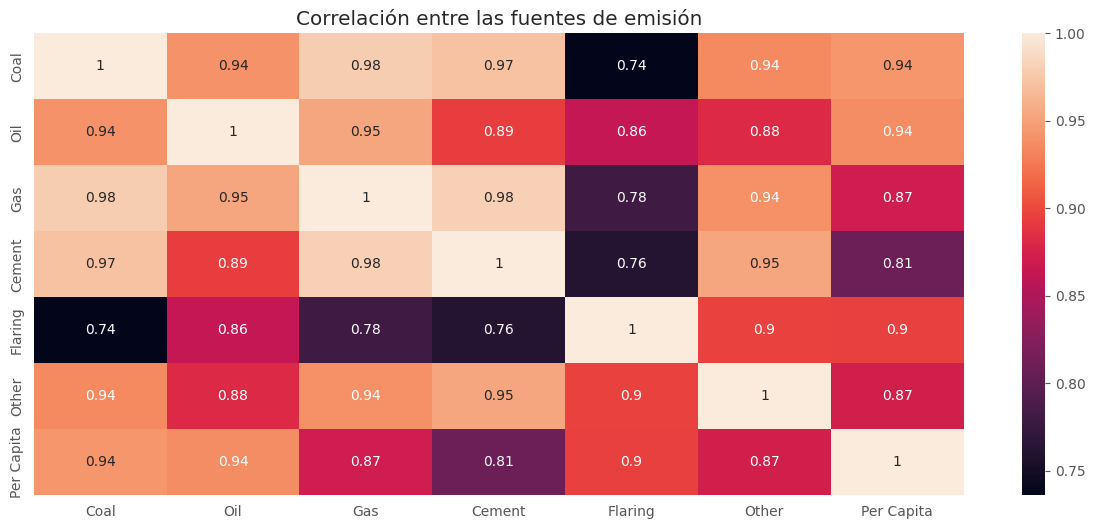

In [ ]:
# Crear heatmap para visualizar la correlación entre las fuentes de emisión
plt.figure(figsize = (15, 6))
sns.heatmap(Global.iloc[:, 4:11].corr(), annot = True)

plt.title('Correlación entre las fuentes de emisión')
plt.show()

#### 2.3.9  ¿Cómo han cambiado las emsiones de CO₂ por región a lo largo del tiempo?

In [ ]:
# Promedio de emisiones por año en cada región
africa_mean = africa.groupby('Year').mean(numeric_only=True).reset_index()

asia_mean = asia.groupby('Year').mean(numeric_only=True).reset_index()

europe_mean = europe.groupby('Year').mean(numeric_only=True).reset_index()

latin_america_mean = latin_america.groupby('Year').mean(numeric_only=True).reset_index()

north_america_mean = north_america.groupby('Year').mean(numeric_only=True).reset_index()

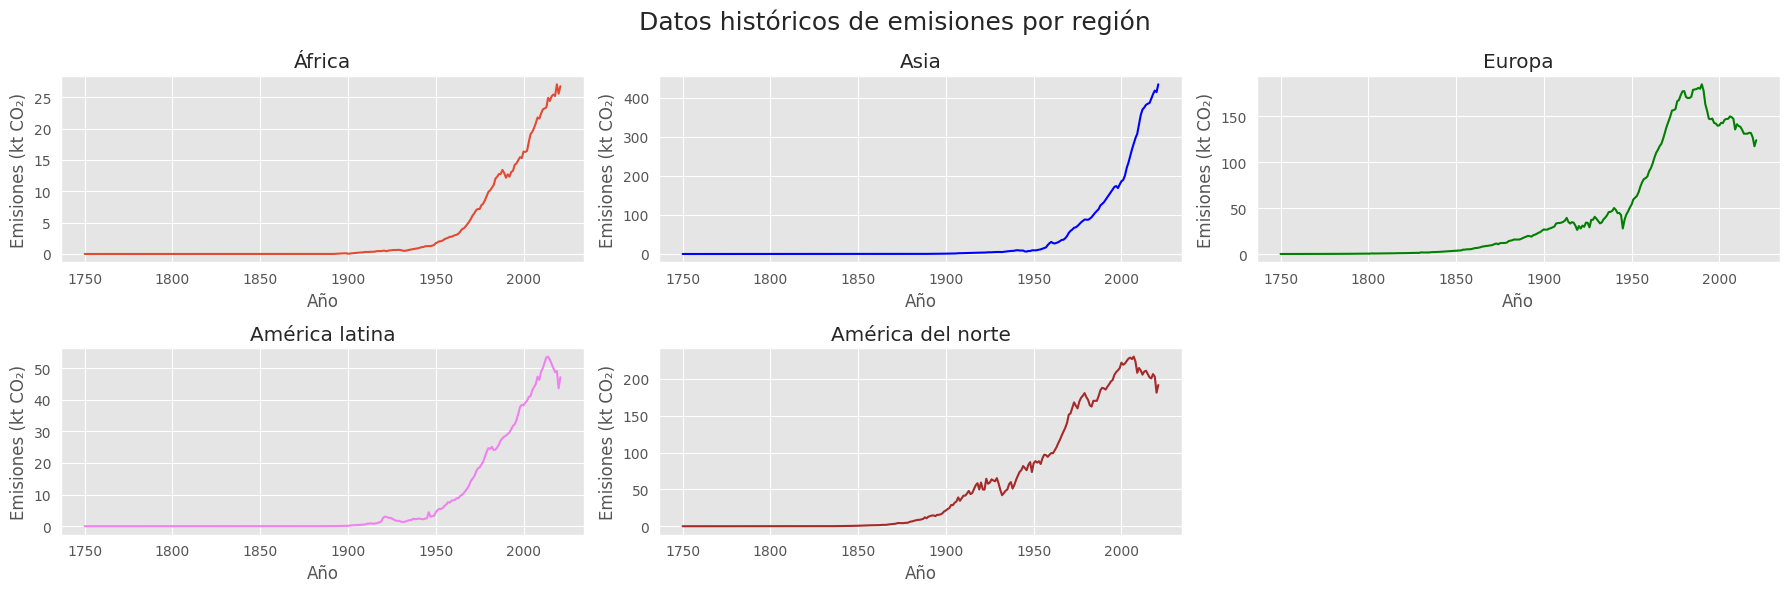

In [ ]:
# Crear gráfico de linea
plt.figure(figsize = (18,6))

# África
plt.subplot(2, 3, 1)
plt.plot(africa_mean['Year'], africa_mean['Total'])
plt.title('África')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# Asia
plt.subplot(2, 3, 2)
plt.plot(asia_mean['Year'], asia_mean['Total'], color=('blue'))
plt.title('Asia')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# Europa
plt.subplot(2, 3, 3)
plt.plot(europe_mean['Year'], europe_mean['Total'], color=('green'))
plt.title('Europa')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# América del sur
plt.subplot(2, 3, 4)
plt.plot(latin_america_mean['Year'], latin_america_mean['Total'], color=('violet'))
plt.title('América latina')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

# América del norte
plt.subplot(2, 3, 5)
plt.plot(north_america_mean['Year'], north_america_mean['Total'], color=('brown'))
plt.title('América del norte')
plt.xlabel('Año')
plt.ylabel('Emisiones (kt CO₂)')

plt.suptitle('Datos históricos de emisiones por región', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Extraer el promedio de emisiones totales por cada región
Africa = africa['Total'].sum()
Asia = asia['Total'].sum()
Europe = europe['Total'].sum()
Latinamerica = latin_america['Total'].sum()
Northamerica = north_america['Total'].sum()

# Crear listas con los nombres de las regiones y los promedios de emisiones
Regiones = ["África", "Asia", "Europa", "América latina", "América del norte"]
Valores = [Africa,  Asia, Europe, Latinamerica, Northamerica]

In [ ]:
data = {'Regiones': Regiones, 'Emisiones': Valores}
df_regiones = pd.DataFrame(data)

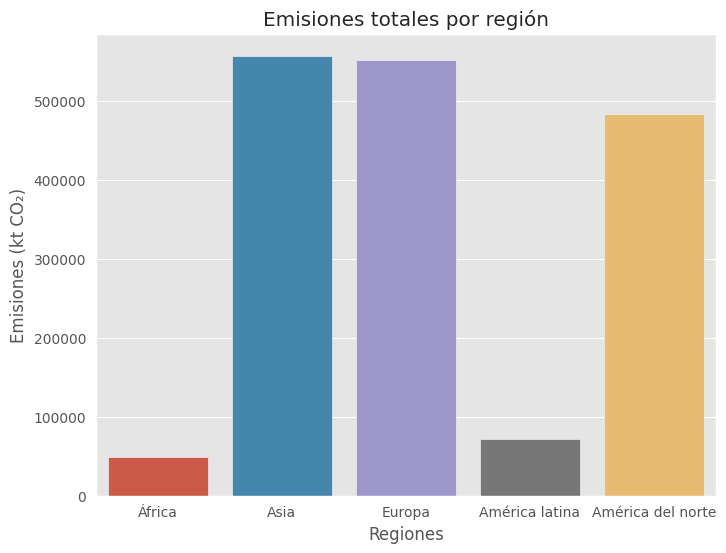

In [ ]:
# Crear grafico de barras para el promedio de emisiones por región
plt.figure(figsize = (8,6))
sns.barplot(x = df_regiones['Regiones'] , y = df_regiones['Emisiones'])

plt.title('Emisiones totales por región')
plt.xlabel('Regiones')
plt.ylabel('Emisiones (kt CO₂)')
plt.show()

## 3 Algunas conclusiones


---

Desde los primeros registros, las emisiones de CO₂ han crecido exponencialmente hasta la actualidad. Siendo Asia, Europa y América del norte, las regiones con mayor contribución en el total de emisiones.

En cuanto a las fuentes de emisión evaluadas en este caso, existe gran correlación entre ellas e inciden directamente sobre las emisiones totales.

Observando el total de emisiones, los países que generan más emisiones son Estados Unidos, China, Rusia, Alemania, Reino Unido, Japón, India, Francia, Canadá y Ucrania. En la mayoría de estos países las principales fuentes de emisión son el carbón y petróleo, en mayor medida, seguidos por el gas.
En el periodo 2011 - 2021, entre los países con más emisiones per cápita se encuentran Catar, Trinidad y Tobago, Curazao, Kuwait, Baréin y Emiratos Árabes.

Además, se puede observar que algunos países de la misma región comparten patrones similares en la tendencia de las emisiones a lo largo del tiempo, lo que da lugar a suponer que el comportamiento de las emisiones puede variar según el nivel de desarrollo de cada país, la población, el consumo de energía, las políticas ambientales, etc.

## 4 Modelos predictivos

### 4.1 Feature Selection (Forward Selection)

In [ ]:
# Selecionar un país en especifico
country = 'USA'
df_country = df[df['Country'] == country]
df_country = df_country.dropna()

In [ ]:
# Preparación de datos para el modelo
X = df_country.drop(['Country', 'ISO 3166-1 alpha-3', 'Total', 'Per Capita'], axis=1)
y = df_country['Total']

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

<ipython-input-35-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-35-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-35-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-35-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-35-a6

['Oil', 'Coal', 'Gas', 'Flaring', 'Cement', 'Other']

### 4.2 Entrenamiento y evaluación (Algoritmo de regresión lineal)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
X = df_country[['Oil', 'Coal', 'Gas', 'Flaring', 'Cement', 'Other']].values
y = df_country['Total'].values

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Crear modelo
lr = LinearRegression()

# Ajustar el modelo con x_train e y_train
lr.fit(X_train, y_train)

# Predecir con x_test
y_pred = lr.predict(X_test)

# Evaluar la presicion del modelo utilizando el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE', mse)

rmse = np.sqrt(mse)
print("RMSE", rmse)

# Evaluar la presicion del modelo utilizando el error absoluto medio (MAE)
mae = mean_absolute_error(y_test,y_pred)
print("MAE", mae)

# Evaluar la presicion del modelo utilizando r2
r2 = r2_score(y_test,y_pred)
print("r2", r2)

MSE 1.975167770461642e-13
RMSE 4.444285961165913e-07
MAE 2.897118539143169e-07
r2 1.0


Observando los valores de las métricas de regresión lineal, se pueden sacar las siguientes conclusiones:


*   MSE: Un valor tan bajo, indica que el modelo se ajusta bien a los datos. En este caso, el valor de MSE es 1.975167770461642e-13, lo que indica que el modelo tiene una precisión muy alta.

*   RMSE: En este caso, el valor de RMSE es 4.444285961165913e-07, lo que indica que la desviación estándar de los errores es muy baja.

*  MAE: En este caso, el valor de MAE es 2.897118539143169e-07, lo que indica que el modelo tiene una precisión muy alta.

*  r2: Un valor de R2 cercano a 1 indica un buen ajuste del modelo. En este caso, el valor de R2 es 1.0, lo que indica que el modelo se ajusta perfectamente a los datos y explica toda la varianza de la variable dependiente.

En resumen, las métricas de regresión presentadas indican que el modelo de regresión lineal utilizado se ajusta muy bien a los datos y tiene una alta precisión en las predicciones.
